In [1]:
objective 

1. which are the top 10 store having maximun number of sales ?
2. what is the overall sales trend ?
3. linear regression
4. multiple linear regression 
5. Time series forecasting .

SyntaxError: invalid syntax (3525467479.py, line 3)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
walmart = pd.read_csv('Walmart data.csv')

In [3]:
walmart.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [4]:
walmart['Date'] = pd.to_datetime(walmart['Date'],format = '%d-%m-%Y')
walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
walmart.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


C:\Users\Kartik\AppData\Local\Temp\ipykernel_9696\343694998.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  walmart.info(null_counts= True)


In [6]:
type(walmart)

pandas.core.frame.DataFrame

In [7]:
walmart.shape

(6435, 8)

In [8]:
col_max = walmart.max(axis=0)
col_max

Store                            45
Date            2012-10-26 00:00:00
Weekly_Sales             3818686.45
Holiday_Flag                      1
Temperature                  100.14
Fuel_Price                    4.468
CPI                      227.232807
Unemployment                 14.313
dtype: object

In [9]:
walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# Top 10 stores sales

In [10]:
store_totalsales= walmart.groupby('Store').sum()['Weekly_Sales'].reset_index()
store_totalsales 

top10_stores = store_totalsales.nlargest(10,'Weekly_Sales')
top10_stores.reset_index()

# lowest store sales: store = 33 , sales = 37160221.96

C:\Users\Kartik\AppData\Local\Temp\ipykernel_9696\1489609668.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  store_totalsales= walmart.groupby('Store').sum()['Weekly_Sales'].reset_index()


,index,Store,Weekly_Sales
0,19,20,3.013978e+08
1,3,4,2.995440e+08
2,13,14,2.889999e+08
3,12,13,2.865177e+08
4,1,2,2.753824e+08
5,9,10,2.716177e+08
6,26,27,2.538559e+08
7,5,6,2.237561e+08
8,0,1,2.224028e+08
9,38,39,2.074455e+08


<BarContainer object of 10 artists>

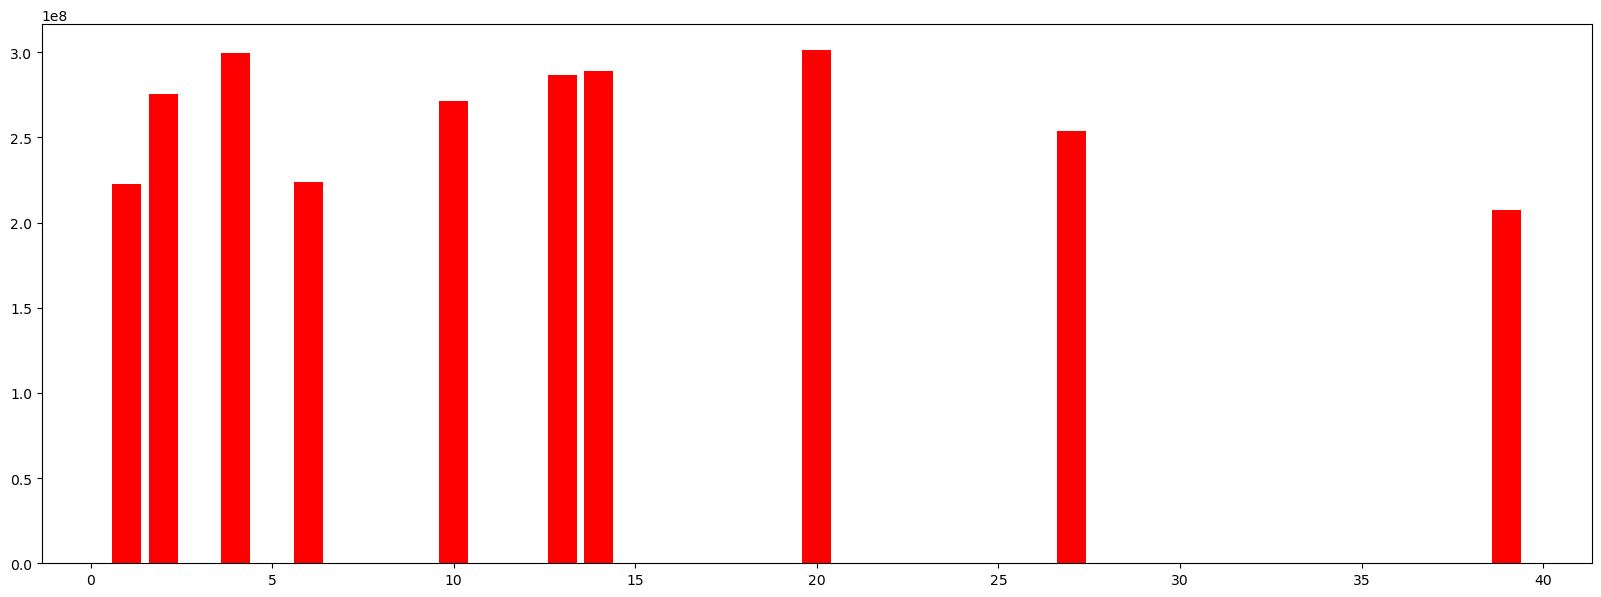

In [11]:

plt.figure(figsize = (20,7))
plt.bar(top10_stores['Store'],top10_stores['Weekly_Sales'],color='red')



# Sales trend

In [12]:
walmart['Date'].min()

Timestamp('2010-02-05 00:00:00')

In [13]:
walmart['Date'].max()

Timestamp('2012-10-26 00:00:00')

In [14]:
walmart["year_month"] = walmart['Date'].apply(lambda x : x.strftime('%Y-%m'))
walmart["year_month"]

0       2010-02
1       2010-02
2       2010-02
3       2010-02
4       2010-03
         ...   
6430    2012-09
6431    2012-10
6432    2012-10
6433    2012-10
6434    2012-10
Name: year_month, Length: 6435, dtype: object

In [15]:
walmart_salestrend = walmart.groupby('year_month').sum()['Weekly_Sales'].reset_index()
walmart_salestrend

walmart_salestrend.to_csv("walmart.time_series")

C:\Users\Kartik\AppData\Local\Temp\ipykernel_9696\3812452598.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  walmart_salestrend = walmart.groupby('year_month').sum()['Weekly_Sales'].reset_index()


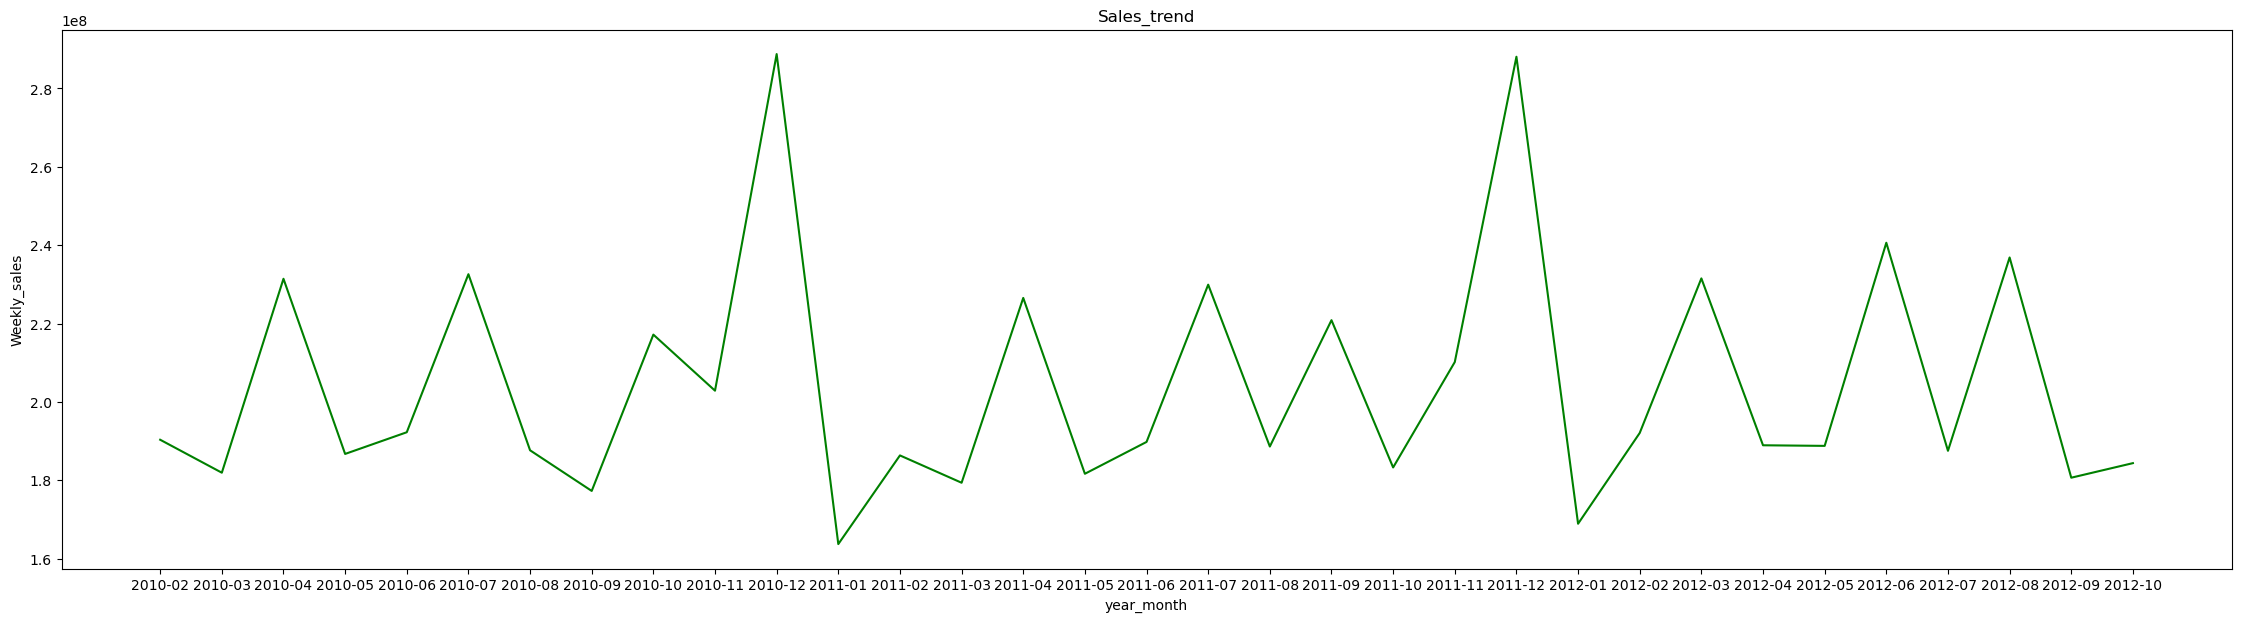

In [16]:
plt.figure(figsize = (28,7))
plt.plot(walmart_salestrend["year_month"],walmart_salestrend["Weekly_Sales"], color ='green')
plt.title('Sales_trend')
plt.xlabel('year_month')
plt.ylabel('Weekly_sales')
plt.show()

Regression

In [17]:
corr = walmart.corr()
corr

C:\Users\Kartik\AppData\Local\Temp\ipykernel_9696\928987287.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = walmart.corr()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


<AxesSubplot:>

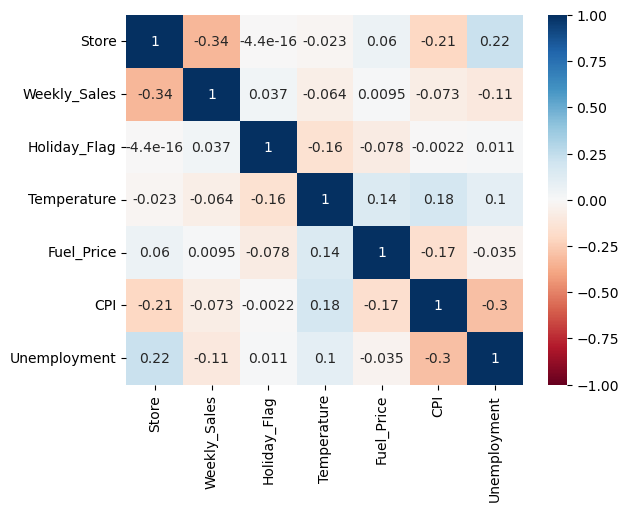

In [18]:
sns.heatmap(corr , cmap ='RdBu',vmin = -1,vmax = 1,annot=True)

# linear regression model 

In [19]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

x=walmart[["Weekly_Sales"]]       #independent
y=walmart[["Temperature"]]        #dependent

In [20]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state = 33)

In [21]:
X_train,y_train

(      Weekly_Sales
 3934    1319054.57
 396      411775.80
 3786    1820723.17
 2827    2064991.71
 362      360617.37
 ...            ...
 3273    1384921.63
 2706    1375101.26
 578      281706.41
 5848    1347175.93
 2439    1254107.84
 
 [3861 rows x 1 columns],
       Temperature
 3934        89.85
 396         64.00
 3786        66.43
 2827        53.73
 362         86.19
 ...           ...
 3273        69.19
 2706        69.83
 578         55.46
 5848        74.06
 2439        45.63
 
 [3861 rows x 1 columns])

In [22]:
X_train=np.array(X_train).reshape(-1,1)
X_train

array([[1319054.57],
       [ 411775.8 ],
       [1820723.17],
       ...,
       [ 281706.41],
       [1347175.93],
       [1254107.84]])

In [23]:
X_test=np.array(X_test).reshape(-1,1)
X_test

array([[1179738.5 ],
       [ 770157.29],
       [1677248.24],
       ...,
       [2546123.78],
       [1877358.86],
       [ 446617.89]])

In [24]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3861, 1), (3861, 1), (2574, 1), (2574, 1))

In [25]:
regressor = LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression()

In [26]:
print(regressor.intercept_)

[62.88713265]


In [27]:
print(regressor.coef_) 

[[-2.24516998e-06]]


In [28]:
# -ve value states that there is inverse relationship between two variable (as independent increase the dependent decrease)

In [29]:
y_pred = regressor.predict(X_test)
y_pred

array([[60.23841919],
       [61.15799862],
       [59.12142526],
       ...,
       [57.17065198],
       [58.6721429 ],
       [61.88439957]])

In [30]:
print('mean absolute error : ',metrics.mean_absolute_error(y_test,y_pred))
print('mean squared error : ',metrics.mean_squared_error(y_test,y_pred))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test,y_pred)))

# better the Root mean i.e better the model 

mean absolute error :  15.199451161961484
mean squared error :  336.28744513190946
root mean squared error :  18.338141812405897


# multiple linear regression 

In [31]:
x=walmart[["Weekly_Sales"]]      
y=walmart[["Holiday_Flag","Temperature"]]

In [32]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state = 33)

In [33]:
y_train

,Holiday_Flag,Temperature
3934,0,89.85
396,0,64.00
3786,0,66.43
2827,0,53.73
362,0,86.19
...,...,...
3273,0,69.19
2706,0,69.83
578,0,55.46
5848,0,74.06


In [34]:
X_train=np.array(X_train).reshape(-1,1)
X_train

array([[1319054.57],
       [ 411775.8 ],
       [1820723.17],
       ...,
       [ 281706.41],
       [1347175.93],
       [1254107.84]])

In [35]:
X_test=np.array(X_test).reshape(-1,1)
X_test

array([[1179738.5 ],
       [ 770157.29],
       [1677248.24],
       ...,
       [2546123.78],
       [1877358.86],
       [ 446617.89]])

In [36]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3861, 1), (3861, 2), (2574, 1), (2574, 2))

In [37]:
regressor = LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = regressor.predict(X_test)
y_pred

array([[ 0.07522845, 60.23841919],
       [ 0.07174574, 61.15799862],
       [ 0.07945882, 59.12142526],
       ...,
       [ 0.08684694, 57.17065198],
       [ 0.08116038, 58.6721429 ],
       [ 0.06899466, 61.88439957]])

In [39]:
print('mean absolute error : ',metrics.mean_absolute_error(y_test,y_pred))
print('mean squared error : ',metrics.mean_squared_error(y_test,y_pred))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test,y_pred)))

mean absolute error :  7.6638489087276955
mean squared error :  168.17353689702762
root mean squared error :  12.96817400010609


In [40]:
# here we can say that multiple regression is more effective

# Time series forecasting 

In [41]:
ws = pd.read_csv("walmart.time_series",index_col='year_month',parse_dates=True)
del ws["Unnamed: 0"]
ws.head()

,Weekly_Sales
year_month,
2010-02-01,1.903330e+08
2010-03-01,1.819198e+08
2010-04-01,2.314124e+08
2010-05-01,1.867109e+08
2010-06-01,1.922462e+08


In [42]:
ws.shape

(33, 1)

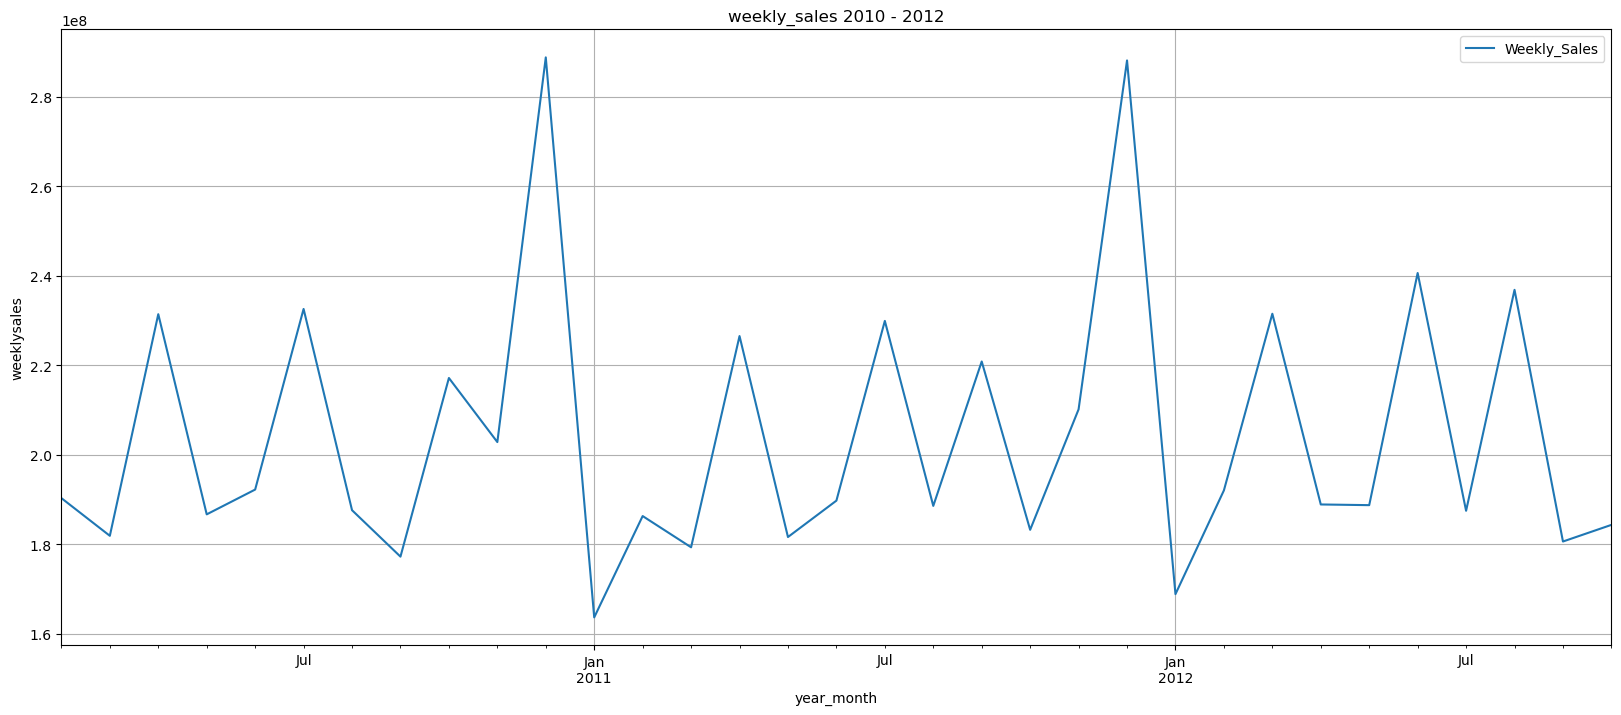

In [43]:
ws.plot(figsize=(20,8))
plt.title("weekly_sales 2010 - 2012")
plt.xlabel("year_month")
plt.ylabel("weeklysales")
plt.grid()

In [44]:
round(ws.describe())

,Weekly_Sales
count,33.0
mean,204158151.0
std,30473305.0
min,163703967.0
25%,184361680.0
50%,189773385.0
75%,226526511.0
max,288760533.0


In [45]:
from statsmodels.tsa.stattools import adfuller

In [46]:
def ad_test(dataset):
    dftest = adfuller(dataset,autolag= 'AIC')
    print("1. ADF : " , dftest[0])
    print("2. p-value : ",dftest[1])
    print("3. no of lags : ",dftest[2])
    print("4. No of obs for ADF regression and critical value calculation : ",dftest[3])

In [47]:
ad_test(ws)

1. ADF :  -6.164473786749468
2. p-value :  7.044293727364498e-08
3. no of lags :  1
4. No of obs for ADF regression and critical value calculation :  31


# ARIMA model  
(AR(p) - auto-regression ,  I(d) - intergration ,  MA(q) - moving average)

In [48]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [49]:
model = auto_arima(ws,trace = True,suppress_warnings = True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1233.736, Time=1.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1233.970, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1231.650, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1228.238, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1359.226, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1237.409, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1229.590, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1342.175, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.786 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   33
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -611.119
Date:                Tue, 05 Sep 2023   AIC                           1228.238
Time:                        19:00:54   BIC                           1232.728
Sample:                    02-01-2010   HQIC                          1229.749
                         - 10-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.052e+08   2.42e+06     84.799      0.000       2e+08     2.1e+08
ma.L1         -0.6847      0.241     -2.838      0.005      -1.158      -0.212
sigma2      9.027e+14      0.010   9.46e+16      0.000    9.03e+14    9.03e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                21.37
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             1.51
Prob(H) (two-sided):                  0.97   Kurtosis:                         5.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.32e+32. Standard errors may be unstable.
"""